In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.metrics import Precision, Recall
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

import seaborn as sns
import cv2
import pathlib
import os

test = pd.read_csv("C:/Users/ADMIN/Desktop/dataset/train.csv")
test.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [2]:
train = pd.read_csv("C:/Users/ADMIN/Desktop/dataset/test.csv")
train.head()


,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


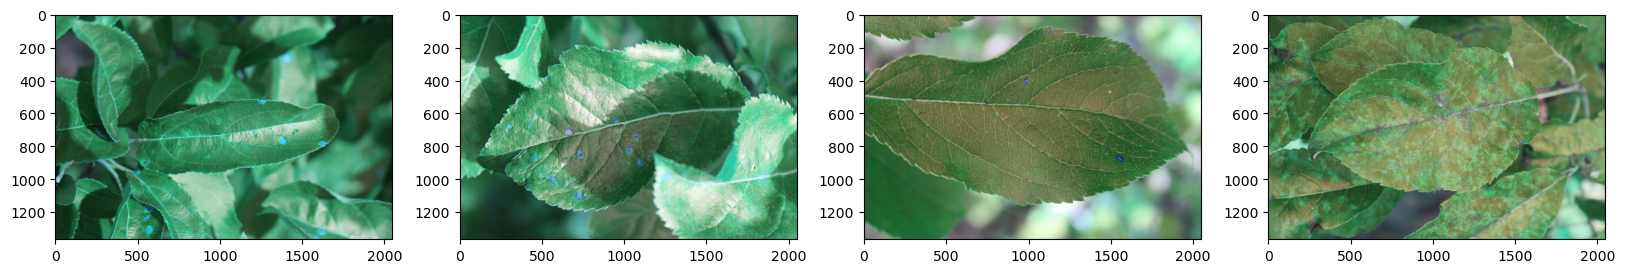

In [3]:
dataset_folder = os.path.join("C:/Users/ADMIN/Desktop/dataset")
imagesDataset = pathlib.Path(os.path.join(dataset_folder, "images"))
listImages = list(imagesDataset.glob("*.*"))
plt.figure(figsize = (20, 6))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    img = cv2.imread(str(listImages[i]))
    plt.imshow(img)
plt.show()

In [4]:
images_id_csv = test['image_id']
healthy_csv = test['healthy']
multiple_diseases_csv =test['multiple_diseases']
rust_csv = test['rust']
scab_csv = test['scab']
images = []
labels = []
for index, values in enumerate(images_id_csv):
    img = cv2.imread(os.path.join(dataset_folder, "images", "{}.jpg".format(values)))
    img = cv2.resize(img, (100, 100))
    img = img/255
    labels.append([healthy_csv[index], multiple_diseases_csv[index], rust_csv[index],
                 scab_csv[index]])
    images.append(img)
plt.figure(figsize = (12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

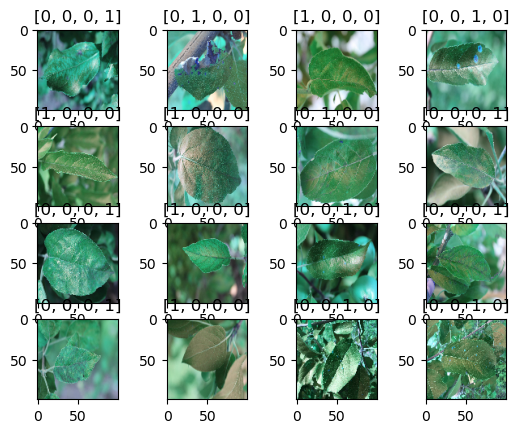

In [5]:
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(images[i])
  plt.title(labels[i])
plt.show()

In [6]:
img_data_g = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=0.35,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        shear_range=0.2,
        width_shift_range=0.15,
        height_shift_range=0.15,
        rescale=None)
images_after_aug = []
labels_after_aug = []

In [7]:
for index, image in enumerate(images):
  for i in range(9):
      img = img_data_g.flow(np.reshape(image, (1, 100, 100, 3))).next()
      images_after_aug.append(np.reshape(img, (100, 100, 3)))
      labels_after_aug.append(labels[index])
labels = np.asarray(labels_after_aug)
images = np.asarray(images_after_aug)
images.shape

(16389, 100, 100, 3)

C:\Users\ADMIN\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


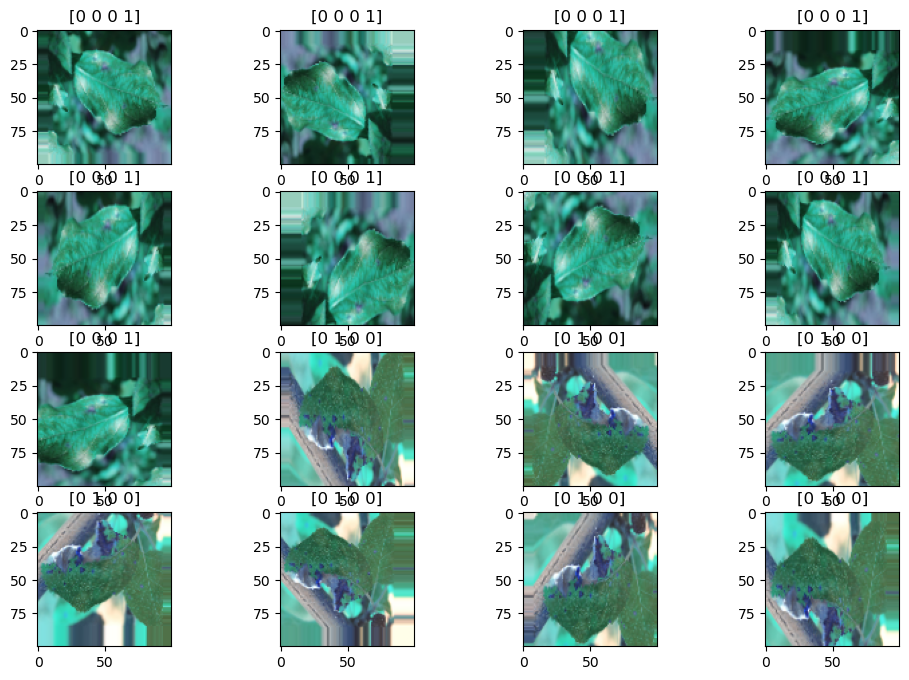

In [8]:
plt.figure(figsize = (12, 8))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(images[i])
  plt.title(labels[i])
plt.show()

In [9]:
train

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4
...,...
1816,Test_1816
1817,Test_1817
1818,Test_1818
1819,Test_1819


In [10]:
test

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [11]:
labels

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.15, random_state = 42)
x_train.shape

(13930, 100, 100, 3)

In [13]:
x_test.shape


(2459, 100, 100, 3)

In [14]:
x_test

array([[[[0.3019608 , 0.63529414, 0.5764706 ],
         [0.3019608 , 0.63529414, 0.5764706 ],
         [0.3019608 , 0.63529414, 0.5764706 ],
         ...,
         [0.6862745 , 0.9490196 , 0.8862745 ],
         [0.6862745 , 0.9490196 , 0.8862745 ],
         [0.6862745 , 0.9490196 , 0.8862745 ]],

        [[0.3019608 , 0.63529414, 0.5764706 ],
         [0.3019608 , 0.63529414, 0.5764706 ],
         [0.3019608 , 0.63529414, 0.5764706 ],
         ...,
         [0.6862745 , 0.9490196 , 0.8862745 ],
         [0.6862745 , 0.9490196 , 0.8862745 ],
         [0.6862745 , 0.9490196 , 0.8862745 ]],

        [[0.3019608 , 0.63529414, 0.5764706 ],
         [0.3019608 , 0.63529414, 0.5764706 ],
         [0.3019608 , 0.63529414, 0.5764706 ],
         ...,
         [0.6862745 , 0.9490196 , 0.8862745 ],
         [0.6862745 , 0.9490196 , 0.8862745 ],
         [0.6862745 , 0.9490196 , 0.8862745 ]],

        ...,

        [[0.56223905, 0.89949393, 0.86027825],
         [0.5623346 , 0.8995895 , 0.8603738 ]

In [15]:
d = tf.keras.applications.DenseNet121(include_top=False,
                   input_shape=(100,100,3),
                   pooling=None,
                   weights='imagenet')
for i in d.layers:
  i.trainable = True
output_avg = tf.keras.layers.GlobalAveragePooling2D()(d.output)
output_max = tf.keras.layers.GlobalMaxPooling2D()(d.output)
m = tf.keras.layers.minimum([output_avg, output_max])
m = tf.keras.layers.Dropout(0.5)(m)
m = tf.keras.layers.Dense(128, activation = "sigmoid")(m)
m = tf.keras.layers.Dropout(0.3)(m)
m = tf.keras.layers.Dense(256, activation = "relu")(m)
m = tf.keras.layers.Dropout(0.3)(m)
m = tf.keras.layers.Dense(512, activation = "relu")(m)
m = tf.keras.layers.Dropout(0.3)(m)
m = tf.keras.layers.Dense(4, activation= "softmax")(m)
m = tf.keras.models.Model(inputs = d.input, outputs = m)
m.compile(optimizer = tf.keras.optimizers.Adam(0.001), 
          loss = "categorical_crossentropy", 
          metrics =["accuracy", 
                     Precision(name='precision'), 
                     Recall(name='recall')])
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [28]:
import os
import gc
import re

import cv2
import math
import numpy as np
import scipy as sp
import pandas as pd

import tensorflow as tf
from IPython.display import SVG
import efficientnet.tfkeras as efn
from keras.utils import plot_model
import tensorflow.keras.layers as L
from keras.utils import model_to_dot
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121

import seaborn as sns
from tqdm import tqdm
import matplotlib.cm as cm
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

tqdm.pandas()
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

np.random.seed(0)
tf.random.set_seed(0)

import warnings
warnings.filterwarnings("ignore")


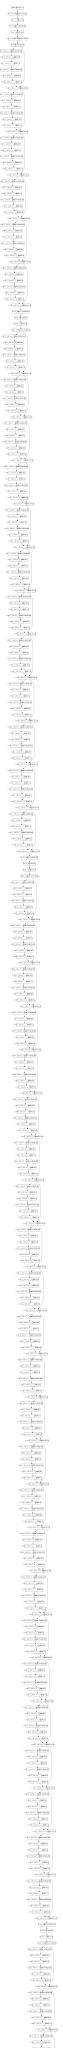

In [48]:
SVG(tf.keras.utils.model_to_dot(m).create(prog='dot', format='svg'))


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.15, random_state = 42)
x_train.shape


(13930, 100, 100, 3)

In [34]:
x_test.shape


(2459, 100, 100, 3)

In [45]:
y_test.shape


(2459,)

In [46]:
y_train.shape


(13930, 4)

In [35]:
history = m.fit(x_train, y_train, epochs = 20, batch_size = 32,
                callbacks = [
                    tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, mode = 'min',
                                                  patience= 1),
                    tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3, mode = 'min', restore_best_weights = True)
                ])

Epoch 1/20
436/436 [==============================] - 653s 1s/step - loss: 0.6066 - accuracy: 0.7844 - precision: 0.8538 - recall: 0.7223 - lr: 0.0010
Epoch 2/20
436/436 [==============================] - 892s 2s/step - loss: 0.3415 - accuracy: 0.8938 - precision: 0.9176 - recall: 0.8711 - lr: 0.0010
Epoch 3/20
436/436 [==============================] - 832s 2s/step - loss: 0.2755 - accuracy: 0.9122 - precision: 0.9316 - recall: 0.8930 - lr: 0.0010
Epoch 4/20
436/436 [==============================] - 797s 2s/step - loss: 0.2353 - accuracy: 0.9238 - precision: 0.9395 - recall: 0.9070 - lr: 0.0010
Epoch 5/20
436/436 [==============================] - 508s 1s/step - loss: 0.2141 - accuracy: 0.9290 - precision: 0.9439 - recall: 0.9164 - lr: 0.0010
Epoch 6/20
436/436 [==============================] - 435s 999ms/step - loss: 0.1905 - accuracy: 0.9358 - precision: 0.9485 - recall: 0.9244 - lr: 0.0010
Epoch 7/20
436/436 [==============================] - 666s 2s/step - loss: 0.1607 - accurac

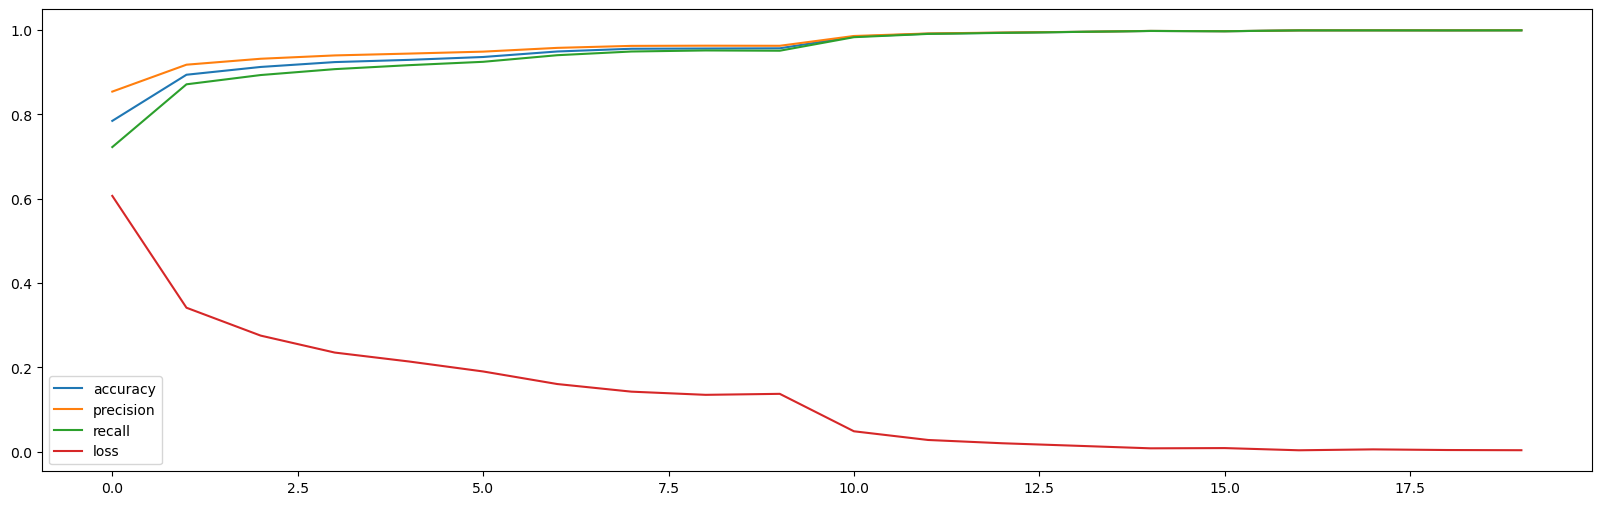

In [36]:
plt.figure(figsize = (20, 6))
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['precision'], label = "precision")
plt.plot(history.history['recall'], label = "recall")
plt.plot(history.history['loss'], label = "loss")
plt.legend()

In [37]:
m.evaluate(x_test, y_test, batch_size= 32)

77/77 [==============================] - 20s 169ms/step - loss: 0.0660 - accuracy: 0.9829 - precision: 0.9841 - recall: 0.9821


[0.06595262885093689,
 0.9829198718070984,
 0.9841075539588928,
 0.9821065664291382]

In [38]:
y_pred = m.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)

77/77 [==============================] - 16s 170ms/step


In [39]:
y_pred


array([3, 3, 2, ..., 2, 0, 0], dtype=int64)

In [40]:
y_pred
y_test = np.argmax(y_test, axis = 1)
cnn_standard_acc = accuracy_score(y_pred, y_test)
print(cnn_standard_acc)

0.9829198861325742


In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


<AxesSubplot:>

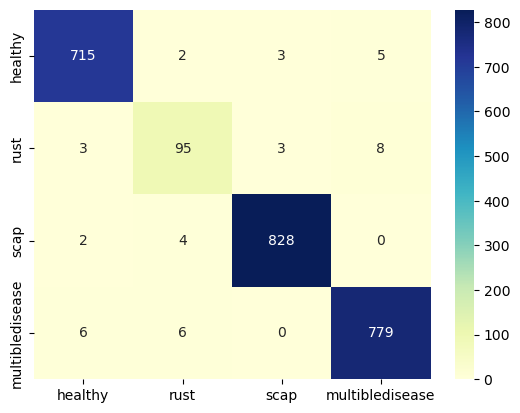

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['healthy', 'rust','scap','multibledisease'],
                         index=['healthy', 'rust','scap','multibledisease'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [44]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       726
           1       0.87      0.89      0.88       107
           2       0.99      0.99      0.99       834
           3       0.98      0.98      0.98       792

    accuracy                           0.98      2459
   macro avg       0.96      0.96      0.96      2459
weighted avg       0.98      0.98      0.98      2459



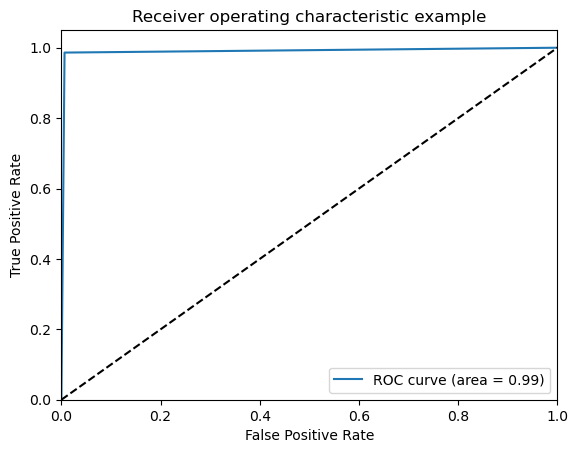

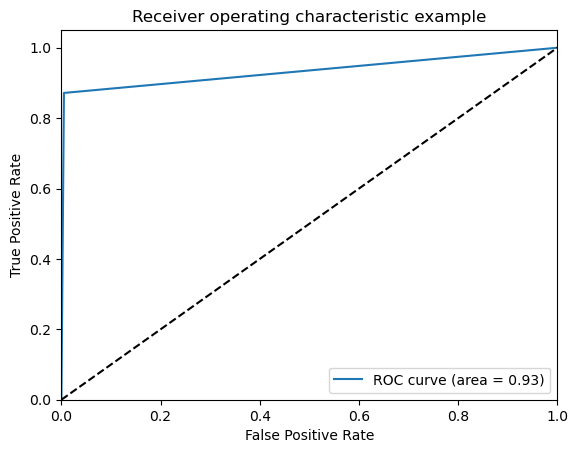

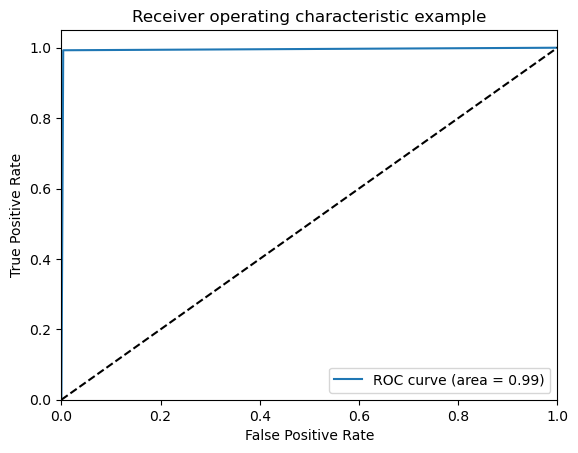

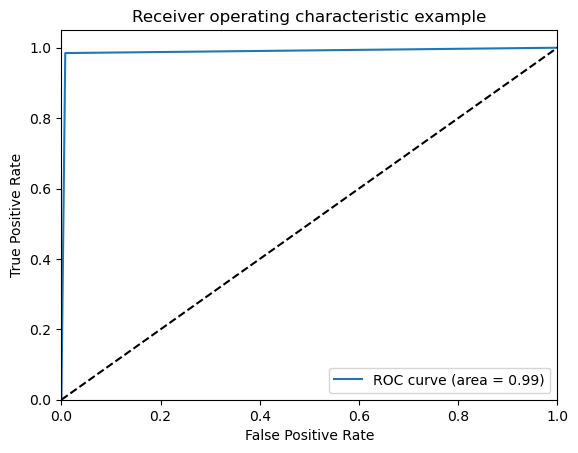

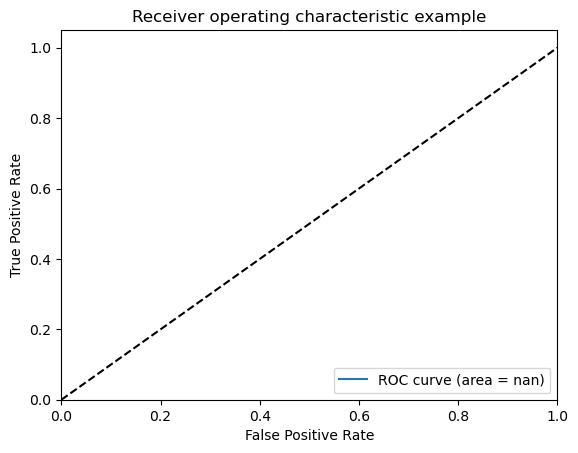

In [47]:
from sklearn.preprocessing import label_binarize
from sklearn import metrics

n_classes=4;
test_y2 = label_binarize(y_test, classes=[0,1,2,3,4])
pred2 = label_binarize(y_pred, classes=[0,1,2,3,4])
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ =metrics.roc_curve(test_y2[:, i], pred2[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
# Plot of a ROC curve for a specific class
for i in range(5):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()